# Pandas(Python Data Analysis Library)

* `pandas는 파이썬에서 사용하는 데이터분석라이브러`이다.
* `행과 열로 이루어진 데이터객체`를 다룰수 있으며 보다 안정적으로 대용량의 데이터를 처리하는데 매우 유용한 도구이다.
* pandas에서는 기본적으로 정의되어 있는 `Series(1차원배열)와 DaraFrame(2차원배열)`을 사용한다.
* pandas의 자료구조들을 빅데이터분석에 높은 수준의 성능을 보여준다.

##### 참고site
* pandas 문서 : http://pandas.pydata.org/pandas-docs/stable/index.html
* 자료구조    : http://pandas.pydata.org/pandas-docs/stable/dsintro.html

##### pandas cheat sheet

><img src="./images/23.데이터분석_pandas_01_cheat_sheet-1.png" />
><img src="./images/23.데이터분석_pandas_01_cheat_sheet-2.png" />

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# 한글처리
from matplotlib import rc, font_manager

font_name = font_manager\
                .FontProperties(\
                    fname='D:/lec/04.python/D2Coding-Ver1.3.2-20180524.ttf')\
                .get_name()
rc('font', family=font_name)
rc('axes', unicode_minus=False) # minus처리

In [ ]:
print(pd.__version__)     # simple info
print(pd.show_versions()) # detail info

##### pandas 자료구조

><img src="./images/23.데이터분석_pandas_02_자료구조.png" width="400" height="300">

## 1. Series

* 인덱스와 값을 가지는 `1차원배열`이다.
* 생성하는 방법은 리스트의 값을 전달해서 생성한다.
* 인덱스는 `자동으로 정의되는 정수인덱스를 사용`한다.
* 단, 인덱스를 정의하지 않으면 0부터 순차적으로 부여된다.

In [ ]:
# 1. Series자료 생성(1) - 기본
ser1 = pd.Series([1,2,3,4,5, np.nan, 6,7,8])
print(ser1)
ser1.plot()
plt.show()

# 시리즈값에 객체(함수)는 에러는 발생하지 않지만 수치데이터가 아니기 때문에
# 시각화시에 에러가 발생한다.
ser1 = pd.Series([1,2,3,4,5, np.nan, 6,7,8, {}])
print(ser1)
ser1.plot()
plt.show()

In [ ]:
# 2. Series자료 생성(2) - 사용자정의 인덱스
# 1) 기본인덱스(숫자)
ser1 = pd.Series([3,6,9,12], index=None)
print(ser1)

# 2) 문자인덱스
# 값의 갯수와 인덱스의 갯수는 동수이어야 한다. 아니면 에러가 발생
ser2 = pd.Series([-3,6,9,12], index=['2016', 2017, 2018, '2019년'])
print(ser2)
print()

print(ser2['2016'])
print(ser2[2017])
print()

# print(ser2[2016])    # key not found 즉, 인덱스는 숫자와 문자를 구분
# print(ser2['2017'])  # key not found


In [ ]:
# 시각화
ser1.plot()
plt.show()

ser2.plot()
plt.show()

In [ ]:
ser2.plot(kind='bar')
plt.show()

In [ ]:
# 3. Series자료 생성(3) - 사용자정의 인덱스(키)와 값(value)
# 인덱스와 값으로 정의할 경우에는 dict자료형으로 정의해야 한다.
employees = {'손흥민':9000, '소향':8000, '이강인':8500, '김민재': 9900}
ser3 = pd.Series(employees)
print(ser3)
print(ser3['소향'])

ser3.plot(kind='barh')
plt.show()

### 2. DataFrame

* 테이블형식의 2차원원배열, 정확하게는 행렬 matrix라 한다.

In [ ]:
# 1. DataFrame생성(1) - 2차원 list로 df을 생성
# pd.DataFrame?
# 값의 갯수는 동수, 만약, 동수가 아닐 경우에는 해당요소에 NaN으로 저장
df = pd.DataFrame([[1,2,3],[4,5,6,10],[7,8,9]])
print(type(df), '\n', display(df))

df.plot()
plt.show()

l = [[1,2,3],[4,5,6],[7,8,9]]
# l.plot() # list에는 plot()함수가 없다.

In [ ]:
# 2. DataFrame생성(2) - dict로 df을 생성
df = pd.DataFrame({
    '체중': [52,80,75,85,82],
    '신장': [162, 184, 178, 192, 180],
    '성별': ['F', 'M', 'M', 'M', 'M']
}, index=['소향', '손흥민', '이강인', '김민재', '김하성'])
df

In [ ]:
# 손흥민의 신장?
print(df['신장'])
print(df.신장)
print()

print(df[df.신장 == 184])

In [ ]:
# 실습1
# 1. 성별이 남자인 자료만 출력
display(df[df.성별 == 'M'])

# 2. 신장이 180이상인 자료
display(df[df.신장 >= 180])

# 3. 시각화(kind=scatter, box, line, bar....)
df.plot()
plt.show()

df.plot(kind='barh')
plt.show()

In [ ]:
# 3. DataFrame생성(3) - numpy배열 or dict로 df을 생성
dates = pd.date_range('20231101', periods=6, freq='M')
print(type(dates), dates)

# 1) numpy배열
df = pd.DataFrame(np.random.randn(6,4)*100, index=dates,
                  columns= ['매출액', '매출원가', "매출이익", "영업이익"])
print(df)

# 2) dict
data = {
    'names': ['소향', '손흥민', '이강인', '김민재', '김하성'],
    'year': [2016,2017,2018,2019,2020],
    'point': [1.5,1.7,2.3,3.6,2.9]
}
df = pd.DataFrame(data, pd.date_range('20231030', periods=5))
display(df)

In [ ]:
# 4. DataFrame생성(4) - 직접 index, columns를 정의해서 df으로 생성
display(data)

df = pd.DataFrame(data, columns=['names', 'year', 'point', 'penalty'],
                 index=['JAN','FEB','MAR','APR','May'])
df

In [ ]:
# 5. DaraFrame의 속성
# 1) describe vs describe()
display(df.describe)   # 속성
display(df.describe()) # 기술통계정보를 출력

# count : 각 열의 갯수
# mean  : 각 열의 평균
# std   : 표준편차
# min   : 최소값
# 25%   : 1사분위수
# 50%   : 2사분위수
# 75%   : 3사분위수
# max   : 최대값

In [ ]:
# 6. DataFrame 조작하기

# 1) 특정열의 값을 일괄로 변경하기
# NaN(결측치, 결측값)인 값을 특정값으로 변경
# df.컬럼명 or df['컬럼명'] 으로 접근
df.penalty = ''
display(df)

df.penalty = 1.0
display(df)

df['penalty'] = 2.0
display(df)

In [ ]:
# 2) 컬럼추가하기(1) - 컬럼명이 없을 경우에 자동으로 추가
# 컬럼을 추가하려면 df.컬럼명으로는 않되고 df['컬럼명']형식으로 실행해야 한다.
df.addvalue1 = 10  # 에러는 아니지만 수행되지 않는다.
display(df)

df['addvalue1'] = 21.5 # 컬럼을 추가할 경우에는 []를 이용해야 한다.
display(df)

In [ ]:
# 2) 컬럼추가하기(2) - 개별로 값을 추가
df['age'] = np.arange(10,15)
display(df)
print(type(np.arange(10,15)))

df['year1'] = np.array([2011, 2012, 2013, 2014, 2015])
display(df)

In [ ]:
# 3) 컬럼삭제하기(1) : df.drop
df.columns # 현재 df의 열명목록

# drop()함수 즉시 적용되지 않는다. 즉, 실행만 되고 결과는 반영되지 않는다.
# df.drop?
df = df.drop(['year1'], axis=1) # 1은 열을 의미
display(df)

In [ ]:
# 5) 컬럼삭제하기(2) - del명령
del df['addvalue1']  # 즉시반영
display(df)

In [ ]:
# 6) index변경하기
print(df.index)
print(df.columns)
print(df.values)

df = pd.DataFrame(data, index=['1월', '2월', '3월', '4월', '5월'])
df

## 3. pandas 기본함수

### 1. csv파일 load/save
* df = pd.read_csv(파일명)
* df.to_csv(파일명)

### 2. 테이터확인
* df.shape()
* df.info()
* df.columns()
* df.dtypes
* df.head(n) : 처음부터 n개까지의 행만 출력, n을 지정하지 않으면 기본값 = 5
* df.tail(n) : 끝에서 부터 n개까지의 행만 출력, n을 지정하지 않으면 기본값 = 5 

### 3. null의 갯수 확인
* df.isnull().sum()

### 4. 특정 열/행 삭제
* df = `df.drop([열명1,,,], axis=1)` : 열을 삭제
* df - df.drop(['행']) : 행삭제

### 5. 특정열이름변경
* df = df.rename(columns={'A':'AA'})

### 6. 특정 열의 갑을 새로운 열로 만들기
* df['A'] = df['B'].str[:5] : 처음에서 5개문자열만 선택
* df['A'] = df['B'].str[:-5] : 뒤에서 5개문자열만 선택

### 7. 컬럼순서변경
* df = pd.DataFrame(df, colums=['C', 'A', 'B']) -> ABC에서 CAB로 순서변경

### 8. DataFrame 합치기
* df = pd.concat([df1, df2], ignore_index=True)

### 9. DataFrame 중복확인 및 제거
* df.duplicated() : 중복확인
* df.drop_duplicated() : 중복제거

### 10. DataFrame 행/열의 위치
* df.loc()
* df.iloc()

In [ ]:
# 1. head()/tail() : 앞에서, 뒤에서 5개씩 출력
display(df.head(2))
display(df.tail(2))

In [ ]:
# 2. loc() : df에서 열이나 행을 선택하는 함수
# 숫자인덱스는 사용불가, 이름으로 행 or 열을 선택
# 한 행만 선택을 경우에는 Series로 리턴, 2개이상일 경우 DF으로 리턴
df = pd.DataFrame(data, index=['one','two','three','four', 'five'])
display(df)

display(type(df.loc['two']), df.loc['two'])  # 인덱스가 two인 행만 Series 출력
display(type(df.loc['two':'four']), df.loc['two':'four'])

# 조금 더 복잡한 loc()
# 전체행중에 year, names만 선택 ; [['year', 'names']]
display(df[['year', 'names']])
display(df.loc['two':'four', ['year', 'names']])

In [ ]:
# 3. iloc() : 숫자인덱스로 접근
display(df.iloc[3])
display(df.iloc[1:4])

# 열과 행범위를 지정
display(df.iloc[1:4, 0:2]) # loc: display(df.loc['two':'four', ['year', 'names']])

# 직접 위치를 지정
display(df.iloc[1,0], df.iloc[1,1], df.iloc[1,2])

In [ ]:
# 4. 블리언인덱싱 : 조건에 맞는 행만 출력
# 2016보다 큰 자료만 출력
df.year > 2016
df['year'] > 2016
df.loc[df.year > 2016]

In [ ]:
# 4. 행삭제
# index가 date형태로 된 자료를 삭제할 경우에는 날짜형태의 문자를
# date type으로 변경후에 삭제 (3.11버전에서는 변경하지 않아도 실행)
df = pd.DataFrame(np.random.randn(6,4))
df.columns = ['A', "B","C","D"]
df.index = pd.date_range('20231101', periods=6)
display(df)
display(type(df.index))

In [ ]:
df = df.drop(['20231101', '20231102'])
df

In [ ]:
# pd.to_datetime() : 날짜형으로 변경하는 방법
df = df.drop([pd.to_datetime('20231104'), pd.to_datetime('20231106')])
df

In [ ]:
# 5. 열삭제

# 1) 한개의 열
df = df.drop(['A'], axis=1)
display(df)

# 2) 여러개의 열
df = df.drop(['B', 'D'], axis=1)
display(df)

### 4. pandas의 데이터분석용함수

* sum()     : 행 or 열의 합
* mean()    : 행 or 열의 평균
* var()     : 행 or 열의 분산
* T         : pivot기능
* groupby() : 그룹핑
* agg()     : 집계

In [ ]:
df = pd.DataFrame({
    'weight': [80.0,70.4,65.5,45.9,51.5],
    'height': [170,180,155,143,154]
})
df

In [ ]:
# 1. sum()
# 열방향 : 기본값 axis=0
# 행방향 : axis = 1
# df.sum?
display(df.sum()) # 열방향
display(df.sum(axis=0)) # 열방향
display(df.sum(axis=1)) # 행방향

print(f'신장의 합 = {df.height.sum()}')
print(f'체중의 합 = {df.weight.sum()}')

In [ ]:
# 2. mean()
# df.mean?
display(df.mean()) # 열방향
display(df.mean(axis=0)) # 열방향
display(df.mean(axis=1)) # 행방향

print(f'신장의 평균 = {df.height.mean()}')
print(f'체중의 평균 = {df.weight.mean()}')

In [ ]:
# 3. var()
a = [10,20,30,40,50]
b = [10,30,30,30,50]
df_a = pd.DataFrame(a)
df_b = pd.DataFrame(b)

# 평균 vs 분산
# 1) 각 두 집단의 평균?
print(f'a의 평균 = {df_a.mean()}')
print(f'b의 평균 = {df_b.mean()}')

# 2) 각 두 집단의 분산?
print(f'a의 분산 = {df_a.var()}')
print(f'b의 분산 = {df_b.var()}')

# 결과분석
# 분산값 a(250) > b(200)의 의미는 a집단이 b집단보다 자료가 더 넓게
# 분포되어 있다는 의미 즉, 분산은 평균에서 자료가 얼마나 분포되어 
# 있는지를 나타낸다.

In [ ]:
# 4 pivot vs melt
# T(pivot)은 세로를 가로로, melt는 가로를 세로 변환하는 함수
display(df_a)
display(df_a.T)
# df_a.T?

display(df_a.T.melt())
df_a.T.melt?
display(df_a.T.melt(ignore_index=False)) 

In [ ]:
# DF를 만드는 방법
# Series처럼 변환 가능한 object를 갖고 있는 dict의 형태를 인자로 부여해서
# DF을 만들 수가 있다. 이 때 index는 자동으로 0부터 시작해서 순번으로 정수
# 인덱스가 부여되고 dic의 키값은 컬럼명으로 된다.
df2 = pd.DataFrame({
    'A': range(1,5),
    'B': pd.date_range('20231101', periods=4),
    'C': pd.Series(1, index=list(range(4)), dtype='float32'),
    'D': np.array([3]*4, dtype='int32'),
    'E': pd.Categorical(['test', 'train', 'test', 'train']),
    'F': 'foo'
})
df2

In [ ]:
# 5. sort_index(axis, ascending)
# df2.sort_index?
display(df2.sort_index(axis=0, ascending=False))
display(df2.sort_index(axis=1, ascending=False))

In [ ]:
# 5. sort_values(by)
# df2.sort_values?
df2.sort_values(by='E')

In [ ]:
# apply()함수 : 특정 열/행에 특정함수를 설정하는 함수
df3 = pd.DataFrame(np.random.rand(4,3)
                 , columns=['b', 'd', 'e']
                 , index=['서울','부산','대전','광주'])
df3

In [ ]:
# 7. apply()
# df3.apply?
# 함수적용
# 1) 일반함수
def f(x,y):
    return x+y
print(f'일반함수 = {f(10,10)}')

# 2) lambda함수
l = lambda x,y:x+y
print(f'람다함수 = {l(10,10)}')
print()

func = lambda x:x.max() - x.min()
display(df3.apply(func, axis=0))
display(df3.apply(func, axis=1))
display(df3.apply(lambda x:x.max() - x.min(), axis=1))

### 5. pandas를 이용한 데이터분석(csv파일)

In [ ]:
input_file = './data/pandas/input.csv'
output_file = './data/pandas/output.csv'

In [ ]:
# 1. csv파일읽기(1) : python문법으로만 사용하기
# newlin='' : 개행문자를 무시하고 읽기, 이 옵션이 없다면 마지막에 빈라인이 추가
with open(input_file, 'r', newline='') as reader:
    with open(output_file, 'w', newline='') as writer:
        header = reader.readline()
        # print(header)
        header = header.strip()
        header_list = header.split(',')
        # print(type(header_list), header_list)
        
        # print(','.join(map(str, header_list)) + '\n')
        # header_list의 각 사이에 comma를 삽입후 list자료를 문자열로 변환
        # 개행문자추가
        # header_list요소를 string을 변환
        # print(map(str, header_list))
        # header행을 문자열로 저장
        writer.write(','.join(map(str, header_list)) + '\n')
        for row in reader:
            row = row.strip()
            row_list = row.split(',')
            print(row_list)
            writer.write(','.join(map(str, row_list)) + '\n')

In [ ]:
# 2. csv파일읽기(2) : csv 내장모듈 사용하기
import csv
import sys

output_file = './data/pandas/output_1.csv'
with open(input_file, 'r', newline='') as csv_in_file:
    with open(output_file, 'w', newline='') as csv_out_file:
        filereader = csv.reader(csv_in_file, delimiter=',')
        filewriter = csv.writer(csv_out_file, delimiter=',')
        for row in filereader:
            print(row)
            filewriter.writerow(row)

In [ ]:
# 3. csv파일읽기(3) : pandas 사용하기
output_file = './data/pandas/output_2.csv'
# pd.read_csv?
df = pd.read_csv(input_file)
display(df)

df.to_csv(output_file, index=False) # index는 0부터 부여

In [ ]:
# 4. pandas를 이용한 filtering(1) - 문자열 or 숫자
output_file = './data/pandas/output_3.csv'

# 필터링조건 : Supplier Name = 'B' or Cost > 600
df = pd.read_csv(input_file)
display(df)

df.loc[(df['Supplier Name'].str.contains('B')) | (df['Cost'] < 200), :]
result = df.loc[(df['Supplier Name'].str.contains('B')) | (df['Cost'] < 200), :]
display(result)

result.to_csv(output_file, index=False)

In [ ]:
# 5. pandas를 이용한 filtering(2) - 날짜형
output_file = './data/pandas/output_4.csv'
df = pd.read_csv(input_file)
display(df)

# 구매일자 '2014-01-20'와 '2018-01-30'자료만 필터링
dates = ['2014-01-20', '2018-01-30']

# isin()
print(df['Purchase Date'].isin(dates))
result = df.loc[df['Purchase Date'].isin(dates), :]
display(result)

result.to_csv(output_file, index=False)

### 6. DataFrame의 고급 인덱싱

* DataFrame에서는 특정한 데이터를 추출하는 것을 `인덱싱 indexing`이라 한다.
* pandas에서는 numpy행렬과 같이 쉼표를 사용한 `(행인덱스, 열인덱스)` 형식의 2차원 인덱싱을 지원하기 위해 아래와 같은 `인덱서 indexer`를 제공
|indexer| 설명|
|:---:|:-----------|
|`loc`|라벨값 기반의 2차원 인덱싱|
|`iloc`|순서를 나타내는 정수기반의 2차원 인덱싱|
|`at`|라벨값 기반의 2차원 인덱싱(한 개의 scala값만 검색)|
|`iat`|순서를 나타내는 정수기반의 2차원 인덱싱(한 개의 scala값만 검색)|

In [ ]:
df = pd.DataFrame(np.arange(10, 22).reshape(3,4)
                , index=['a','b','c']
                , columns=['A','B','C','D'])
df

In [ ]:
# 1. loc인덱서를 사용하려면 df.loc[행인덱스, 열인덱스]

# 행인덱서의 값이 'a', 열인덱서의 값이 'A'인 값 추출
df.loc['a', 'A']

# 값에서 slicing
df.loc['b':, 'A':'B']
df.loc['b':, :]
df.loc['b', :]

# list형태로
df.loc[['a', 'c'], ['B', 'D']]

# 한개의 행을 추출하기(인덱서 즉, loc함수 사용하지 않고 추출하기)
df[1:2] # 슬라이싱

In [ ]:
# 2. iloc

# 1) 특정위치의 값
print(df.iloc[0,0], df.iloc[0,1], df.iloc[0,2], df.iloc[0,3], )
print(df.iloc[1,0], df.iloc[1,1], df.iloc[1,2], df.iloc[1,3], )
print(df.iloc[2,0], df.iloc[2,1], df.iloc[2,2], df.iloc[2,3], )

# 2) 행과 열(1차원 - Series)
print(df.iloc[:2, 2])
print(df.iloc[0, -2:])

# 3) 행과 열(2차원 - DataFrame)
display(df.iloc[1:3, 1:3])

In [ ]:
# at, iat - 1차원 only
print(df.loc['a', 'A'])
print(df.at['a', 'A'])
print()

%timeit df.loc['a', 'A']
%timeit df.at['a', 'A']
print()

%timeit df.iloc[0, 0]
%timeit df.iat[0, 0]

In [ ]:
# 3. df의 기초정보
df.info()

#### 연습문제

* ./data/pandas/????.csv

In [ ]:
'''  
문1) score.csv 파일을 읽어와서 다음과 같이 처리하시오.
   조건1> tv 칼럼이 0인 관측치 2개 삭제 (for, if문 이용)
   조건2> score, academy 칼럼만 추출하여 DataFrame 생성
   조건3> score, academy 칼럼의 평균 계산 - <<출력 결과 >> 참고    
   
<<출력 결과 >>
   score  academy
1     75        1
2     77        1
3     83        2
4     65        0
5     80        3
6     83        3
7     70        1
9     79        2
score      76.500
academy     1.625   
'''
# 1. pd.read_csv
score = pd.read_csv('./data/pandas/score.csv')
score

# 2. tv컬럼이 0인 관측치 2개 삭제(for, if문이용)
tvs = score.tv
print(type(tvs), tvs)

idx = 0
for tv in tvs:
    if tv == 0:
        score = score.drop(idx)
    idx += 1
    
display(score)

# 3. score, academy 칼럼만 추출하여 DataFrame 생성
col_name = ['score', 'academy']
score_df = score[col_name]
display(score_df)

# 4. score, academy 칼럼의 평균 계산
display(score_df.mean())

In [ ]:
''' 
문2) tips.csv 파일을 읽어와서 다음과 같이 처리하시오.
   조건1> 파일 정보 보기 : info()
   조건2> header를 포함한 앞부분 5개 관측치 보기 
   조건3> header를 포함한 뒷부분 5개 관측치 보기 
   조건4> 숫자 칼럼 대상 요약통계량 보기 
   조건5> 흡연자(smoker) 유무 빈도수 계산 
   조건6> 요일(day) 칼럼의 유일한 값 출력 
'''
tips = pd.read_csv('./data/pandas/tips.csv')

# 1> 파일 정보 보기 : info()
tips.info()

# 2> header를 포함한 앞부분 5개 관측치 보기 
tips.head()

# 3> header를 포함한 뒷부분 5개 관측치 보기 
tips.tail()

# 4> 숫자 칼럼 대상 요약통계량 보기 
tips.describe()

# 5> 흡연자(smoker) 유무 빈도수 계산 
# 빈도함수 : value_counts()
smoker_count = tips.smoker.value_counts()
print(smoker_count)
print()

gender_count = tips.sex.value_counts()
print(gender_count)

# 6> 요일(day) 칼럼의 유일한 값 출력 
day = tips.day.unique()
print(day)

In [ ]:
''' 
문3) 다음 df를 대상으로 iloc() or loc() 속성을 이용하여 행과 열을 선택하시오.
   조건1> 1,3행 전체 선택    
   조건2> 1~4열 전체 선택 
   조건3> 1,3행 1,3,5열 선택
'''
data = np.arange(1, 16).reshape(3,5) # 3x5
df = pd.DataFrame(data, index=["one","two","three"], columns=[1,2,3,4,5])
display(df)

# 1> 1,3행 전체 선택 
display(df.iloc[[0,2],:])

# 2> 1~4열 전체 선택 
display(df.iloc[:,1:5])

# 3> 1,3행 1,3,5열 선택
display(df.iloc[[0,2],[0,2,4]])

In [ ]:
'''  
문4) iris.csv 파일을 읽어와서 다음과 같이 처리하시오.
   조건1> 1~4 칼럼 대상 vector(Series) 생성(col1, col2, col3, col4)    
   조건2> 각 칼럼 대상 합계, 평균, 표준편차 구하기 
   조건3> 1,2 칼럼과 3,4 칼럼을 대상으로 각 df1, df2 데이터프레임 생성
   조건4> df1과 df2 칼럼 단위 결합 iris_df 데이터프레임 생성      
'''
iris = pd.read_csv('./data/pandas/iris.csv')
display(iris)

In [ ]:
#    조건1> 1~4 칼럼 대상 vector(Series) 생성(col1, col2, col3, col4) 
col1 = iris.iloc[:, 0]
col2 = iris.iloc[:, 1]
col3 = iris.iloc[:, 2]
col4 = iris['Petal.Width']
col1;col2;col3;col4

In [ ]:
#    조건2> 각 칼럼 대상 합계, 평균, 표준편차 구하기 
print(col1.sum(), col1.mean(), col1.std())

In [ ]:
#    조건3> 1,2 칼럼과 3,4 칼럼을 대상으로 각 df1, df2 데이터프레임 생성
df1 = pd.DataFrame({'S.Length':col1, 'S.Width': col2})
df2 = pd.DataFrame({'P.Length':col3, 'P.Width': col3})
display(df1.head())
display(df2.tail())

In [ ]:
#    조건4> df1과 df2 칼럼 단위 결합 iris_df 데이터프레임 생성 
iris_df = pd.concat([df1, df2], axis=1) # 열단위
display(iris_df)
display(iris_df.info())

In [ ]:
''' 유방암
문5) wdbc_data.csv 파일을 읽어와서 x,y 변수를 생성하시오.
     <조건1> 파일 가져오기, 정보 확인 
     <조건2> y변수 : diagnosis
     <조건3> x변수 : id 칼럼 제외 30개 칼럼 
'''
wbc = pd.read_csv('./data/pandas/wbc_data.csv')
display(wbc)

In [ ]:
# columns추출
cols = list(wbc.columns)
cols

# x(독립변수, radius_mean~dimension_worst), y(종속변수, diagnosis)
y = wbc.diagnosis
print(type(y), y)
print(y.value_counts())

x = wbc[cols[2:]]
print(type(x), x)
display(x.head())

### 7. SQL문과 비교 실습

https://pandas.pydata.org/pandas-docs/stable/getting_started/comparison/comparison_with_sql.html

In [ ]:
# url = 'https://www.kaggle.com/datasets/hnazari8665/tipscsv'
# tips = pd.read_csv(url)
import pandas as pd
tips = pd.read_csv('./data/pandas/tips.csv')
tips.head()

##### 1. select

In [ ]:
# select total_bill, tip, smoker, time from tips limit 5'
tips[['total_bill', 'tip', 'smoker', 'time']].head(5)

In [ ]:
# select * from tips
#  where time = 'Dinner'
#  limit 5

is_dinner = tips['time'] == 'Dinner'
print(is_dinner)
print(is_dinner.value_counts())

tips[tips['time'] == 'Dinner'].head()

In [ ]:
# tip > 5.00 and time = Dinner
# select * 
#   from tips
#  where time='Dinner' and tip>5.00;
is_dinner = tips['time'] == 'Dinner'
gt5 = tips['tip'] > 5.00
print(gt5.value_counts())

tips[(tips['time'] == 'Dinner') & (tips['tip'] > 5.00)].head()
tips[is_dinner & gt5].head()

In [ ]:
# select * 
#   from tips
#  where size > 5 or total_bill > 45
tips[(tips['size']>5) | (tips['total_bill'] > 45)].head()

In [ ]:
# null값 : notna(), isna() / notnull(), isnull()
# print(dir(tips))
import numpy as np

samples = pd.DataFrame({
    'col1': ['A','B',np.NaN,'C','D'],
    'col2': ['F', np.NaN, 'G', 'H', 'I']
})
samples

# select * from samples where col1 is not null
display(samples[samples.col1.notna()])
display(samples[samples['col1'].notnull()])

# select * from samples where col2 is null
display(samples[samples.col2.isna()])
display(samples[samples['col2'].isnull()])

###### groupby & agg

In [ ]:
a = ['a','b','c','a','a','b','c','c']
b = [10,15,20,15,30,40,35,5]
df = pd.DataFrame([x for x in zip(a,b)], columns=['student', 'score'])
df

In [ ]:
# A. groupby()
# 1) count()
display(df.groupby('student').count())

# 2) max(), min()
display(df.groupby('student').max(), df.groupby('student').min())

# 3) sum()
display(df.groupby('student').sum())

# 4) mean()
display(df.groupby('student').mean())

In [ ]:
# B. agg()
# df.agg?
# df.agg([사용자함수, count, sum......], {score:sum, grade:coutn})
df.groupby('student').agg(['count', 'max', 'min', 'sum', 'mean'])

In [ ]:
# tips.groupby
# tips.count
# select sex, count(*) from tips group by sex;

# 1. size() - Series 
display(type(tips.groupby('sex').size()), tips.groupby('sex').size())
display(type(tips.groupby('sex')['total_bill'].count()), tips.groupby('sex')['total_bill'].count())

# 2. count() - DataFrame
display(type(tips.groupby('sex').count()), tips.groupby('sex').count())

In [ ]:
# agg()
# select day, avg(tip), count(*)
#   from tips
#  group by day
tips.groupby('day').agg({'tip':np.mean, 'day':np.size})

In [ ]:
# agg()
# select smoker, day, avg(tip), count(*)
#   from tips
#  group by somoker, day
display(tips.groupby(['smoker', 'day']).agg({'tip':np.mean, 'day':np.size}))
display(tips.groupby(['day', 'smoker']).agg({'tip':np.mean, 'day':np.size}))

##### join : merge()

In [ ]:
df1 = pd.DataFrame({'key': ['A', 'B', 'C', 'D'], 'val':np.random.randn(4)})
df2 = pd.DataFrame({'key': ['B', 'D', 'D', 'E'], 'val':np.random.randn(4)})
display(df1)
display(df2)

In [ ]:
# merge()
# select *
#   from df1 inner join de2 on df1.key = df2.key
#  (from df1, df2 where df1.key = df2.key)
# pd.merge?
display(pd.merge(df1, df2, on='key'))

# df의 index를 이용한 merge
df2_index = df2.set_index('key')
print(type(df2_index))
display(df2_index)

pd.merge(df1, df2_index, left_on='key', right_index=True)

In [ ]:
# left jon : df1기준
# select * from df1 left outer join df2 on df1.key = df2.key
pd.merge(df1, df2, on='key', how='left')

In [ ]:
# right jon : df2기준
# select * from df1 right outer join df2 on df1.key = df2.key
pd.merge(df1, df2, on='key', how='right')

In [ ]:
# full jon : df1, df2 전체
# select * from df1 full outer join df2 on df1.key = df2.key
pd.merge(df1, df2, on='key', how='outer')

##### union : concat()

In [ ]:
df1 = pd.DataFrame({'city':['서울', '부산', '인천'], 'rank':range(1,4)})
df2 = pd.DataFrame({'city':['서울', '대전', '대구'], 'rank':[1,4,5]})
display(df1)
display(df2)

In [ ]:
# union all
# select city, rank from df1
# union all
# select city, rank from df2
# concat()
pd.concat([df1, df2])

In [ ]:
# union
# select city, rank from df1
# union
# select city, rank from df2
# concat().drop_duplicates()
pd.concat([df1, df2]).drop_duplicates()

In [ ]:
# mariadb(mysql) offset : nlargest
# select * from tips
#  order by tip desc
#  limit 10 offset 5;
tips.nlargest(10, columns='tip').head()

In [ ]:
# oracle : row_number over()
# select * from
#      (
#          select t.*
#               , row_number over(partition by day order by total_bill desc) as rn
#            from tips t
#      )
#  where rn < 3
#  order by day, rn
# sort_values(), assign(), groupby(), cumcount(), query()
display(tips.assign(rn=tips.sort_values(['total_bill'], ascending=False)
                   .groupby(['day'])
                   .cumcount()+1)
            .query(' rn < 3')
            .sort_values(['day', 'rn'])
)

In [ ]:
# Oracle 의 rank() - 1
# df.rank()
display(
    tips.assign(rank=tips.groupby(['day'])['total_bill']
                         .rank(method='first', ascending=False))
        .query('rank < 3')
        .sort_values(['day', 'rank'])
)

In [ ]:
# Oracle 의 rank() - 2
# select * from 
#   (
#       select t.*
#            , rank() over(partition by sex order by tip) as rnk_min
#         from tips 1
#        where tip < 2
#   )
#  where rnk_min < 3
#  order by sex, rnk_min

display(
    tips[tips['tip'] < 2]
          .assign(rnk_min=tips.groupby('sex')['tip'].rank(method='min'))
          .query('rnk_min < 3')
          .sort_values(['sex', 'rnk_min'])
)

In [ ]:
total size sex rank_min

##### 2. update

In [ ]:
# update tips
#    set tip = tip * 2
#  where tip < 2;
tips.loc[tips['tip'] < 2, 'tip'] *= 2
tips.head()

##### 3. delete

In [ ]:
# delete from tips
#  wehre tip > 3;
tips = tips.loc[tips['tip']>3]
tips.count()

### 8. SQL로 데이터 추출하기(pandasql)
* pip install pandasql
* https://pypi.org/project/pandasql
* https://www.kaggle.com/dataraj/sql-on-pandas-dataframe-using-pandasql

In [ ]:
!pip show pandasql

In [ ]:
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

In [ ]:
from pandasql import sqldf, load_meat, load_births
meats = load_meat()
births = load_births()
print(type(meats), type(births))

In [ ]:
print(meats.describe())
print()

print(births.describe())
print()

print(meats.info())
print()

print(births.info())

In [ ]:
display(meats.head())

display(pysqldf("select * from meats limit 10").head())

In [ ]:
q = '''
    select m.date, m.beef, b.births
      from meats m inner join births b on m.date = b.date;
'''
result = pysqldf(q)
result.head()

In [ ]:
result.beef.plot()
result.births.plot()

In [ ]:
q = '''
    select strftime('%Y', date) as year
         , sum(beef) as beef_total
      from meats
     group by year;
'''
result = pysqldf(q)
result.head()

In [ ]:
result.plot()

In [ ]:
result.plot(kind='bar')

### 9. 데이타분석실습 : 영화평점데이터

* https://grouplens.org/datasets/movielens
* datasets중에 `m1-latest-small.zip`을 다운로드
* 압축해제 ./data/movielens/2

In [ ]:
df_movies = pd.read_csv('./data/movielens/2/movies.csv', delimiter=',')
df_ratings = pd.read_csv('./data/movielens/2/ratings.csv', delimiter=',')

In [ ]:
display(df_movies.head())
display(df_ratings.head())

In [ ]:
result_df = pd.DataFrame(columns=['영화별 평균 평점'])
display(result_df.head())

In [ ]:
# 1. 사용자가 평가한 모든 영화의 전체평균평점은?
# mean()
display(f"영화 평균 평점 : {df_ratings['rating'].mean()}")

In [ ]:
# 2. 각 사용자별 영화평균평점은?
display(np.unique(df_ratings.userId).size)
display(df_ratings.userId.drop_duplicates().size)

for userid in range(1, np.unique(df_ratings.userId).size+1):
    print(f'사용자id = {userid}', end=", ")
    print('평균평점 = ', df_ratings.loc[df_ratings['userId']==userid, 'rating'].mean())

In [ ]:
# 3. 각 영화별 평균평점은?
df_movies.head()
movieids = df_movies.movieId.unique()
print(type(movieids), len(movieids))

for movieid in movieids:
    movie_mean = df_ratings.loc[df_ratings.movieId==movieid, 'rating'].mean()
    result_df.loc[movieid] = movie_mean
    
result_df.head()

In [ ]:
# 4. df_moveis와 result_df를 병합하기
df = pd.merge(df_movies
              , result_df
              , left_on='movieId'
              , right_index=True, how='inner')
df.head()
df[['movieId','title','영화별 평균 평점']].head()

In [ ]:
# 5. 평균평점이 가장 높은 영화의 제목을 출력하기
# 동률일 경우 모두 출력
df['영화별 평균 평점'].max()
df.loc[df['영화별 평균 평점'] == df['영화별 평균 평점'].max(), 'title'].head()

In [ ]:
# 6. comedy영화중 가장 평점이 낮은 영화제목을 출력하세요
df['영화별 평균 평점'].min()
df['genres'].str.contains('Comedy')
df[df['genres'].str.contains('Comedy')]\
               .loc[df['영화별 평균 평점'] == df['영화별 평균 평점'].min()].head()

In [ ]:
# 7. 2015년에 평가된 모든 Romance영화의 평균평점을 출력하세요
import time
start = time.mktime(time.strptime("2015-01-01 00:00:00", "%Y-%m-%d %H:%M:%S"))
end = time.mktime(time.strptime("2016-01-01 00:00:00", "%Y-%m-%d %H:%M:%S"))
print(start, end)

df2 = pd.merge(df_movies, df_ratings, left_on='movieId'
               , right_on='movieId', how="inner")
result = df2.loc[df2['genres'].str.contains('Romance')]
result.head()

result_df = pd.DataFrame(columns=['평점'])
result_df.head()

result.loc[(result['timestamp']>=start) 
           & (result['timestamp']<end), 'rating'].mean()


### 10. 데이터분석실습 - 항공운항데이터분석

* 2006~2008년 자료가 약 2000만건으로 엑셀로는 처리가 불가능
* pandas로 처리하면 대용량의 데이터자료도 신속하게 처리할 수 있다.
* https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/HG7NV7

In [ ]:
df_2006 = pd.read_csv('./data/airline/2006.csv', delimiter=',', encoding='utf-8') 
df_2007 = pd.read_csv('./data/airline/2007.csv', delimiter=',', encoding='utf-8') 
df_2008 = pd.read_csv('./data/airline/2008.csv', delimiter=',', encoding='utf-8') 

In [ ]:
# 데이터프레임 정보
df = pd.DataFrame()
df_2006 = pd.DataFrame()
df_2007 = pd.DataFrame()

# merge(), concat()
# df = pd.concat([df_2006, df_2007[2:], df_2008[2:]])
df = df_2008
len(df)

In [ ]:
# df의 정보확인
display(df.shape)
display(df.head())
display(df.columns)
display(df.describe())
display(df.info())

In [ ]:
# 1. 실습용 dataframe
df_work = df[['Year', 'Month','ArrDelay', 'DepDelay']]
df_work.head()

In [ ]:
# 2. 결측치확인 : isna() value_counts()
df_work.ArrDelay.isna()
df_work['DepDelay'].isna()

display(df_work.ArrDelay.isna().value_counts())
display(df_work.DepDelay.isna().value_counts())

# 결측치 각각 5건만 출력
display(df_work[df_work.ArrDelay.isna()].head())
display(df_work[df_work.DepDelay.isna()].head())

In [ ]:
# 3. 결측치제거 : dropna()
# 옵션: how=[any|all]
#       ... any : 행의 열중에 1개라고 NaN이 있으면 제거
#       ... any : 행의 열 모두 NaN일 경우에 제거
# df.dropna?
df_work = df_work.dropna(how='any')
display(df_work.shape)
display(df_work.ArrDelay.isna().value_counts())
display(df_work.DepDelay.isna().value_counts())

In [ ]:
# 4. 년별, 월별 항공운항데이터의 건수를 출력하기
# groupby(), size()
result = df_work.groupby(['Year']).size()
display(result)

result = df_work.groupby(['Year', 'Month']).size()
display(result)

result = df_work.groupby(['Year', 'Month'], as_index=True).size()
display(result)

In [ ]:
# 5. 년월별 결과데이터로 시각화(Line그래프)
result.plot(kind='barh')

In [ ]:
# 6. 결과를 저장
result.to_csv('./data/airline/airline_depdelay.csv', sep=",", index=True)

In [ ]:
# 7. 실습. agg()를 이용해서 년월별로 depdelay, arrdelay 건수를 출력
# np.size, np.mean
# 1) 각각 평균과 건수를 출력
display(
    df_work.groupby(['Year', 'Month'])
           .agg({'DepDelay': [np.mean, np.size],
                 'ArrDelay': [np.mean, np.size]
                })
)

display(
    df_work.groupby(['Year'])
           .agg({'DepDelay': [np.mean, np.size],
                 'ArrDelay': [np.mean, np.size]
                })
)

result = df_work.groupby(['Year', 'Month'])\
           .agg({'DepDelay': np.size,
                 'ArrDelay': np.size
                })
display(result)
# 2) 결과저장 : 출발지연건수, 도착지연건수를 출력 & 저장(airline_delay_1.csv)
result.to_csv('./data/airline/airline_delay_1.csv', sep=',', index=False)

In [ ]:
# 3) 시각화 : line, bar, hist, area, box
# plot(), plt.show()
result.plot()
plt.show()

result.plot(kind='barh')
plt.show()

result.plot(kind='hist')
plt.show()

result.plot(kind='area')
plt.show()

result.plot(kind='box')
plt.show()

## 11. 엑셀다루기

### 1. 엑셀파일 읽기/쓰기
* pd.read_excel(id, sheet_name)

In [ ]:
df = pd.read_excel('./data/excel/학생시험성적.xlsx')
display(df)

df = pd.read_excel('./data/excel/학생시험성적.xlsx', sheet_name=1)
display(df)

df = pd.read_excel('./data/excel/학생시험성적.xlsx', sheet_name='2차시험')
display(df)

df = pd.read_excel('./data/excel/학생시험성적.xlsx', sheet_name=None)
display(type(df), df)

In [ ]:
df = pd.read_excel('./data/excel/학생시험성적.xlsx', sheet_name='2차시험'
                  ,index_col=0)
display(df)

df = pd.read_excel('./data/excel/학생시험성적.xlsx', sheet_name='2차시험'
                  ,index_col='학생')
display(df)

In [ ]:
# 2. 엑셀쓰기
data = {
    '학생': ['홍길동', '손흥민', '소향', '이강인', '김민재'],
    '국어': [1,2,3,4,5],
    '수학': [6,7,8,9,10],
    '영어': [11,12,13,14,15],
}
print(data.keys())

df = pd.DataFrame(data, columns=['학생', '국어', '수학', '영어'])
df

In [ ]:
# !pip install xlsxwriter
!pip show xlsxwriter

In [ ]:
# 1) 엑셀저장(1) - 기본
excel_writer = pd.ExcelWriter('./data/excel/학생시험성적_1.xlsx'
                              , engine='xlsxwriter')
print(type(excel_writer), excel_writer)
df.to_excel(excel_writer, index=False)
excel_writer.close()

In [ ]:
# 2) 엑셀저장(2) - sheetname
excel_writer = pd.ExcelWriter('./data/excel/학생시험성적_2.xlsx'
                              , engine='xlsxwriter')
df.to_excel(excel_writer, index=False, sheet_name='중간고사')
excel_writer.close()

In [ ]:
# 3) 엑셀저장(3) - 여러개 sheet 일괄저장
data2 = {
    '학생': ['홍길동', '손흥민', '소향', '이강인', '김민재'],
    '과학': [1,2,3,4,5],
    '물리': [6,7,8,9,10],
    '철학': [11,12,13,14,15],
}
df2 = pd.DataFrame(data2, columns=['학생', '과학', '물리', '철학'])


In [ ]:
excel_writer = pd.ExcelWriter('./data/excel/학생시험성적_3.xlsx'
                              , engine='xlsxwriter')
df.to_excel(excel_writer, index=False, sheet_name='중간고사')
df2.to_excel(excel_writer, index=False, sheet_name='기말고사')
excel_writer.close()

## 2. 엑셀파일 통합, 저장하기

In [ ]:
excel_data_files = [
    './data/excel/담당자별_판매량_Andy사원.xlsx', 
    './data/excel/담당자별_판매량_Becky사원.xlsx',
    './data/excel/담당자별_판매량_Chris사원.xlsx'
]

In [ ]:
# 1. 통합하기(1) - index
total_data = pd.DataFrame()
for f in excel_data_files:
    df = pd.read_excel(f)
    total_data = pd.concat([total_data, df])

display(total_data)

In [ ]:
# 2. 통합하기(2) - index 무시
total_data = pd.DataFrame()
for f in excel_data_files:
    df = pd.read_excel(f)
    total_data = pd.concat([total_data, df], ignore_index=True)

display(total_data)

In [ ]:
!pip show glob2

In [ ]:
# 3. 통합하기(3) - glob 패키지 이용
import glob
# glob.glob?

excel_data_files = glob.glob('./data/excel/담당자별_판매량_*사원.xlsx')
print(type(excel_data_files), excel_data_files)

total_data = pd.DataFrame()
for f in excel_data_files:
    df = pd.read_excel(f)
    total_data = pd.concat([total_data, df], ignore_index=True)

display(total_data)

In [ ]:
# 4. 저장하기(통합파일)
excel_file_name = './data/excel/담당자별_판매량_통합.xlsx'
excel_writer = pd.ExcelWriter(excel_file_name, engine='xlsxwriter')
total_data.to_excel(excel_writer, index=False, sheet_name='담당자별_판매량_통합')
excel_writer.close()
glob.glob(excel_file_name)

## 3. 엑셀파일 조작하기

In [ ]:
# 1. 데이터를 추가, 수정하기
df = pd.read_excel('./data/excel/담당자별_판매량_Andy사원.xlsx')
df

In [ ]:
# 실습1. 데이터변경하기, 핸드백/4분기/331의 값을 0으로 변경
df.loc[2, '4분기']
df.loc[2, '4분기'] = 0
df

In [ ]:
# 실습2: 데이터 추가하기
# 행추가 : 3, 벨트, A, 가, 100, 150, 200, 250
df.loc[3, '제품명'] = '벨트'
df.loc[3, '담당자'] = 'A'
df.loc[3, '지역'] = '가'
df.loc[3, '1분기'] = 100
df.loc[3, '2분기'] = 150
df.loc[3, '3분기'] = 200
df.loc[3, '4분기'] = 250
df

In [ ]:
# 실습3: 데이터 변경하기
# 담당자 A -> Andy로 변경
df['담당자'] = 'Andy'
df

In [ ]:
# 실습4 : 변경된 자료를 "담당자별_판매량_Andy사원_new.xlsx"파일로 저장
file = './data/excel/담당자별_판매량_Andy사원_new.xlsx'
f = pd.ExcelWriter(file, engine='xlsxwriter')
df.to_excel(f, index=False)
f.close()
glob.glob(file)

In [ ]:
# 2. 여러개의 엑셀파일에서 데이터를 수정하기
import re
filname = './data/excel/담당자별_판매량_Andy사원.xlsx'
new_filename = re.sub('.xlsx', '2.xlsx', filname)
new_filename

In [ ]:
excel_data_files = glob.glob('./data/excel/담당자별_판매량_*사원.xlsx')
print(excel_data_files)

for f in excel_data_files:
    df = pd.read_excel(f)
    if(df.loc[1, '담당자'] == 'A'): df['담당자'] = 'Andy'
    elif(df.loc[1, '담당자'] == 'B'): df['담당자'] = 'Becky'
    elif(df.loc[1, '담당자'] == 'C'): df['담당자'] = 'Chris'
    
    f_new = re.sub('.xlsx', '2.xlsx', f)
    # print(f_new) 
    
    new_excel_file = pd.ExcelWriter(f_new, engine='xlsxwriter')
    df.to_excel(new_excel_file, index=False)
    new_excel_file.close()
    
glob.glob('./data/excel/담당자별_판매량_*사원2.xlsx')

In [ ]:
# 3. 엑셀의 필터기능 수행하기
df = pd.read_excel('./data/excel/담당자별_판매량_통합.xlsx')
display(df)

# 1) 핸드백만 추출
df.제품명 == '핸드백'
handbag = df[df.제품명 == '핸드백']
handbag

# 2) 3분기 >=350 and 핸드백
df[(df.제품명 == '핸드백') & (df['3분기'] >= 350)]

# 3) 제품명, 1~4분기까지만 출력
df[['제품명','1분기','2분기','3분기','4분기']]

In [ ]:
# 4. 엑셀데이터계산하기
df = pd.read_excel('./data/excel/담당자별_판매량_통합.xlsx')
handbag = df[df.제품명 == '핸드백']
display(handbag)

handbag.sum()       # 기본값 axis= 0
handbag.sum(axis=0) # 열기준
display(handbag.sum(axis=1, numeric_only=True)) # 행기준

# 1) 핸드백의 연간판매량 & '연간판매량'컬럼 추가
handbag_sum = pd.DataFrame(handbag.sum(axis=1, numeric_only=True)
                           , columns=['연간판매량'])
handbag_sum
handbag_total = handbag.join(handbag_sum)
handbag_total

# 2) 연간판매량으로 정렬
handbag_total.sort_values(by='연간판매량', ascending=False)

In [ ]:
# 연습문제 - handbag_sum을 이용하여 열의 합계구하기
#     제품명 담당자 지역 1분기 2분기 3분기 4분기 연간판매량
# 2   핸드백   A     가    385   316   355   331  1387
# 5   핸드백   B     나    350   340   377   392  1459
# 8   핸드백   C     다    365   383   308   323  1379
# 합계 핸드백  전체  전체 1100  1039  1040  1046  4225
# 힌트) 열합계(axis=0), pivot(T메서드)변환, 합계행 수정
df = pd.read_excel('./data/excel/담당자별_판매량_통합.xlsx')
handbag = df[df.제품명 == '핸드백']

# 1) 행별합계, 마지막열에 추가
handbag_sum = pd.DataFrame(handbag.sum(axis=1, numeric_only=True)
                           , columns=['연간판매량'])
handbag_total = handbag.join(handbag_sum)
handbag_total

# 2) 열별로 분기별합계와 연간판매량합계 구한후 마지막행에 추가
handbag_sum2 = pd.DataFrame(handbag_total.sum(), columns=['합계'])
handbag_sum2
handbag_sum2.T

handbag_total2 = pd.concat([handbag_total, handbag_sum2.T]) 
handbag_total2

# 3) 합계행문자열 변경
handbag_total2.loc['합계', '제품명'] = '핸드백'
handbag_total2.loc['합계', '담당자'] = '전체'
handbag_total2.loc['합계', '지역'] = '전체'

# 4) 최종결과
handbag_total2

## 4. 엑셀파일의 시각화

In [ ]:
# 1. 그래프를 엑셀파일에 넣기
sales = {
    '시간': [9,10,11,12,13,14,15],
    '아이폰': [10,15,12,11,12,14,13],
    '겔럭시': [9,11,14,12,13,10,12],
}
df = pd.DataFrame(sales, index=sales['시간'], columns=['아이폰', '겔럭시'])
df

In [ ]:
# 1) 시각화 & 이미지저장
product_salses = df.plot(grid=True, style=['-*','-.o']
                         , title='시간대별 핸드폰 판매량')

product_salses.set_ylabel('판매량')
product_salses.set_xlabel('판매시간')

plt.savefig('./data/excel/시간대별핸드폰판매량.png', dpi=400)
plt.show()

In [ ]:
# 2. 이미지파일을 엑셀파일에 넣기

# A. 이미지파일 넣기
# 1) ExcelWriter객체생성
excel_file = './data/excel/시간대별핸드폰판매량.xlsx'
excel_writer = pd.ExcelWriter(excel_file, engine='xlsxwriter')

# 2) df의 데이터를 지정된 엑셀시트에 쓰기
df.to_excel(excel_writer, index=True, sheet_name='핸드폰판매량')

# 3) ExcelWriter객체에서 워크시트(worksheet)객체를 생성
worksheet = excel_writer.sheets['핸드폰판매량']

# 4) 워크시트에 차트위치를 지정(d2, 엑셀셀에 위치)
# d2 = 1,3
worksheet.insert_image('D2', './data/excel/시간대별핸드폰판매량.png'
                      , {'x_scale':0.7, 'y_scale':0.7})

# 5) 엑셀파일저장
excel_writer.close()

In [ ]:
# B. chart 넣기
# 1) ExcelWriter객체생성
excel_file = './data/excel/시간대별핸드폰판매량_chart_1.xlsx'
excel_chart = pd.ExcelWriter(excel_file, engine='xlsxwriter')

# 2) df의 데이터를 지정된 엑셀시트에 쓰기
df.to_excel(excel_chart, index=True, sheet_name='Sheet1')

# 3) ExcelWriter객체에서 워크북(workbook)과 워크시트(worksheet)객체를 생성
workbook = excel_chart.book
worksheet = excel_chart.sheets['Sheet1']

# 4) 챠트객체생성(원하는 차트의 종류를 지정)
chart = workbook.add_chart({'type':'line'})

# 5) 챠트생성을 위한 데이터의 범위를 지정
chart.add_series({
    'values': "=Sheet1!$B$2:$B$8",
    'categories': "=Sheet1!$A$2:$A$8",
    'name': "=Sheet1!$B$1"
})
chart.add_series({
    'values': "=Sheet1!$C$2:$C$8",
    'categories': "=Sheet1!$A$2:$A$8",
    'name': "=Sheet1!$C$1"    
})

# 6) chart에 x,y,title을 설정
chart.set_title({'name': '시간대별 핸드폰 판매량'})
chart.set_x_axis({'name':'판매시간'})
chart.set_y_axis({'name':'판매량'})

# 7) 챠트가 들어갈 위치 설정
worksheet.insert_chart('D2', chart)

# 8) 엑셀파일저장
excel_chart.close()

## 12. html 다루기

In [3]:
import pandas as pd
import html5lib
import requests

In [50]:
# 주식정보 : naver
# LG전자 주가 : https://finance.naver.com/item/sise_day.nhn?code=066570
url = 'https://finance.naver.com/item/sise_day.nhn?code=066570&page=1'
df = pd.read_html(requests.get(url, headers={'User-agent': 'Mozilla/5.0'}).text)
print(type(df), len(df))
print(type(df[0]), type(df[1]))
display(df[0].head())
display(df[1].head())

<class 'list'> 2
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>


,날짜,종가,전일비,시가,고가,저가,거래량
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023.11.02,99700.0,600.0,102100.0,103000.0,99600.0,1091362.0
2,2023.11.01,100300.0,600.0,101100.0,101900.0,100000.0,426695.0
3,2023.10.31,99700.0,3400.0,104100.0,105300.0,99300.0,715127.0
4,2023.10.30,103100.0,1500.0,101600.0,104200.0,101600.0,471152.0


,0,1,2,3,4,5,6,7,8,9,10,11
0,1,2,3,4,5,6,7,8,9,10,다음,맨뒤


In [59]:
# 주식정보 : 증권거래소
url = 'http://kind.krx.co.kr/corpgeneral/corpList.do?method=download&searchType=13'
code_df = pd.read_html(requests.get(url
                            , headers={'User-agent': 'Mozilla/5.0'}).text)[0] 
print(type(code_df), len(code_df))
display(code_df.head(2))

# 종목코드를 6자리 정규화
code_df.종목코드 = code_df.종목코드.map('{:06d}'.format)
display(code_df.head(2))

# 회사명과 종목코드를 영문변경
code_df = code_df[['회사명', '종목코드']]
display(code_df.head(2))
code_df = code_df.rename(columns={'회사명':'name', '종목코드':'code'})
display(code_df.head(2))

<class 'pandas.core.frame.DataFrame'> 2647


,회사명,종목코드,업종,주요제품,상장일,결산월,대표자명,홈페이지,지역
0,AJ네트웍스,95570,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,손삼달,http://www.ajnet.co.kr,서울특별시
1,BGF리테일,282330,종합 소매업,체인화 편의점,2017-12-08,12월,민승배,http://www.bgfretail.com,서울특별시


,회사명,종목코드,업종,주요제품,상장일,결산월,대표자명,홈페이지,지역
0,AJ네트웍스,095570,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,손삼달,http://www.ajnet.co.kr,서울특별시
1,BGF리테일,282330,종합 소매업,체인화 편의점,2017-12-08,12월,민승배,http://www.bgfretail.com,서울특별시


,회사명,종목코드
0,AJ네트웍스,095570
1,BGF리테일,282330


,name,code
0,AJ네트웍스,095570
1,BGF리테일,282330


In [63]:
# 함수생성 : 종목이름을 입력하면 종목코드를 리턴하는 함수
# 네이버금융(http://finance.naver.com)
def get_url(compay_name, code_df):
    code = code_df.query(f"name=='{compay_name}'")['code'].to_string(index=False)
    code = code.strip()
    url = f'https://finance.naver.com/item/sise_day.nhn?code={code}'
    print(f'요청 URL = {url}')
    return url

get_url('LG전자', code_df)
get_url('삼성전자', code_df)
get_url('SK', code_df)

요청 URL = https://finance.naver.com/item/sise_day.nhn?code=066570
요청 URL = https://finance.naver.com/item/sise_day.nhn?code=005930
요청 URL = https://finance.naver.com/item/sise_day.nhn?code=034730


'https://finance.naver.com/item/sise_day.nhn?code=034730'

In [67]:
company_name = input('종목검색을 위한 회사이름을 입력하세요 => ')
url = get_url(company_name, code_df)

종목검색을 위한 회사이름을 입력하세요 => LG전자
요청 URL = https://finance.naver.com/item/sise_day.nhn?code=066570


In [80]:
# df 생성
df = pd.DataFrame()

# 1~20페이지
for page in range(1, 21):
    page_url = f'{url}&page={page}'
    print(page_url)
    p_df = pd.read_html(requests.get(page_url
                          , headers={'User-agent': 'Mozilla/5.0'}).text)[0]
    df = pd.concat([df, p_df], ignore_index=True)
    
df = df.dropna() # how = any
df.set_index('날짜', inplace=True)
df.head()

https://finance.naver.com/item/sise_day.nhn?code=066570&page=1
https://finance.naver.com/item/sise_day.nhn?code=066570&page=2
https://finance.naver.com/item/sise_day.nhn?code=066570&page=3
https://finance.naver.com/item/sise_day.nhn?code=066570&page=4
https://finance.naver.com/item/sise_day.nhn?code=066570&page=5
https://finance.naver.com/item/sise_day.nhn?code=066570&page=6
https://finance.naver.com/item/sise_day.nhn?code=066570&page=7
https://finance.naver.com/item/sise_day.nhn?code=066570&page=8
https://finance.naver.com/item/sise_day.nhn?code=066570&page=9
https://finance.naver.com/item/sise_day.nhn?code=066570&page=10
https://finance.naver.com/item/sise_day.nhn?code=066570&page=11
https://finance.naver.com/item/sise_day.nhn?code=066570&page=12
https://finance.naver.com/item/sise_day.nhn?code=066570&page=13
https://finance.naver.com/item/sise_day.nhn?code=066570&page=14
https://finance.naver.com/item/sise_day.nhn?code=066570&page=15
https://finance.naver.com/item/sise_day.nhn?code=

,종가,전일비,시가,고가,저가,거래량
날짜,,,,,,
2023.11.02,99700.0,600.0,102100.0,103000.0,99600.0,1091362.0
2023.11.01,100300.0,600.0,101100.0,101900.0,100000.0,426695.0
2023.10.31,99700.0,3400.0,104100.0,105300.0,99300.0,715127.0
2023.10.30,103100.0,1500.0,101600.0,104200.0,101600.0,471152.0
2023.10.27,101600.0,3700.0,106000.0,106000.0,99000.0,1033993.0


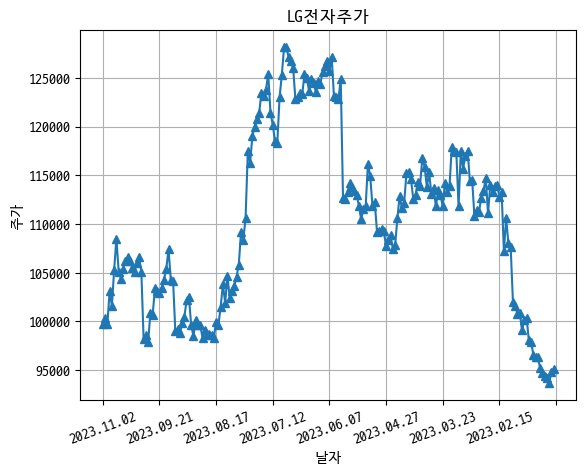

In [81]:
# 시각화
lg = df['종가'].plot(grid=True, style=['-^'], title='LG전자주가', rot=20)
lg.set_ylabel('주가')
lg.set_xlabel('날자')
plt.show()